In [9]:
%matplotlib inline
import math
import pandas as pd
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue', 'magenta']

In [10]:
file = '/home/ebusato/Travail/gowork2/src/gitlab.in2p3.fr/avirm/analysis-go/dpgatca/analysis/pedestal/output.csv'

df = pd.read_csv(file)

Quartets = []
QuartetsWoData = []

for i in range(60):
    Pulses = []
    for j in range(4):
        s = 'ChanWithData240_'
        idx = i*4+j
        s += str(idx)
        #print(s)
        Pulses.append(df[s])
    Quartets.append(Pulses)

for i in range(12):
    Pulses = []
    for j in range(4):
        s = 'ChanWoData48_'
        idx = i*4+j
        s += str(idx)
        #print(s)
        Pulses.append(df[s])
    QuartetsWoData.append(Pulses)


In [14]:
def plotQuartet(pulses, ax, title):
    for i in range(4):
        pulses[i].plot.hist(alpha=0.3, bins=50, color=colors[i])
        ax.set_yscale('log')
        plt.text(0.05, 0.9, title, transform=ax.transAxes)
        plt.text(0.6, 0.8-0.1*i, format(pulses[i].mean(), '.1f'), transform=ax.transAxes, color=colors[i])
        plt.text(0.83, 0.8-0.1*i, format(math.sqrt(pulses[i].var()), '.1f'), transform=ax.transAxes, color=colors[i])

def plotRow(iPlot, iLAPDRow):
    plt.figure(iPlot, figsize=(25,4))
    plt.suptitle('Average amplitudes for LAPD row '+str(iLAPDRow), fontsize=16)

    for i in range(5):
        ax = plt.subplot(1, 6, i+1)
        plt.text(0.6, 0.9, "mean", transform=ax.transAxes)
        plt.text(0.83, 0.9, "std dev", transform=ax.transAxes)
        iQuartet = iLAPDRow*5+i
        plotQuartet(Quartets[iQuartet], ax, "Quartet "+str(iQuartet))
        
    ax = plt.subplot(1, 6, 6)
    plt.text(0.6, 0.9, "mean", transform=ax.transAxes)
    plt.text(0.83, 0.9, "std dev", transform=ax.transAxes)
    iQuartet = iLAPDRow
    plotQuartet(QuartetsWoData[iQuartet], ax, "QuartetWoData "+str(iQuartet))

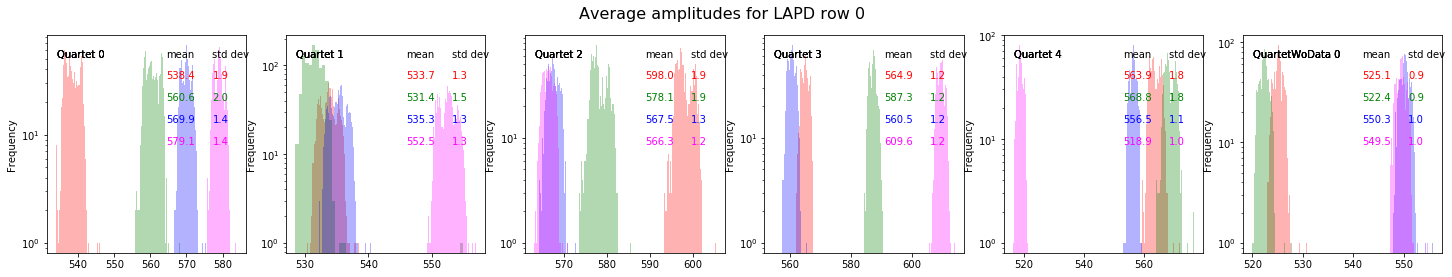

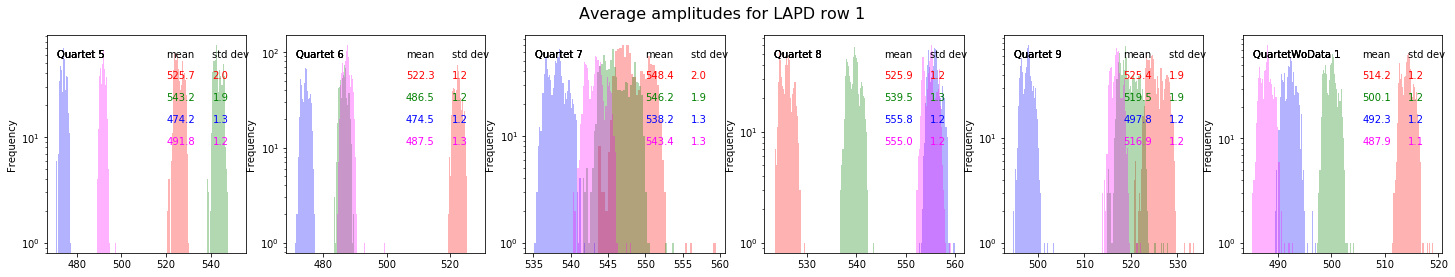

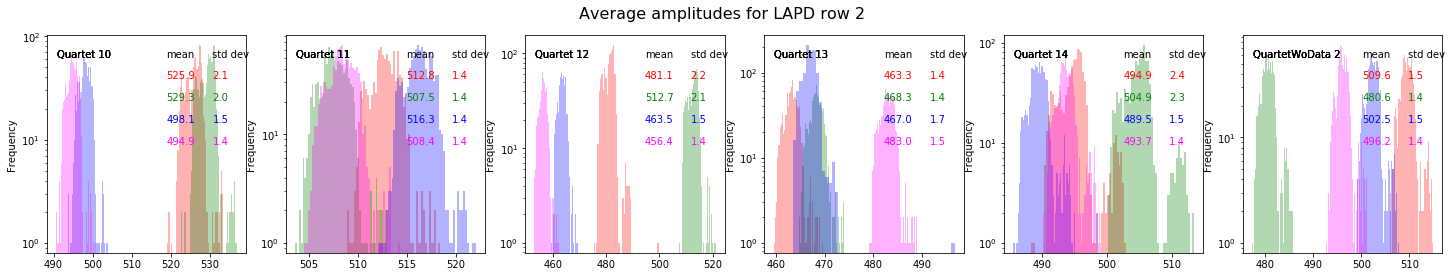

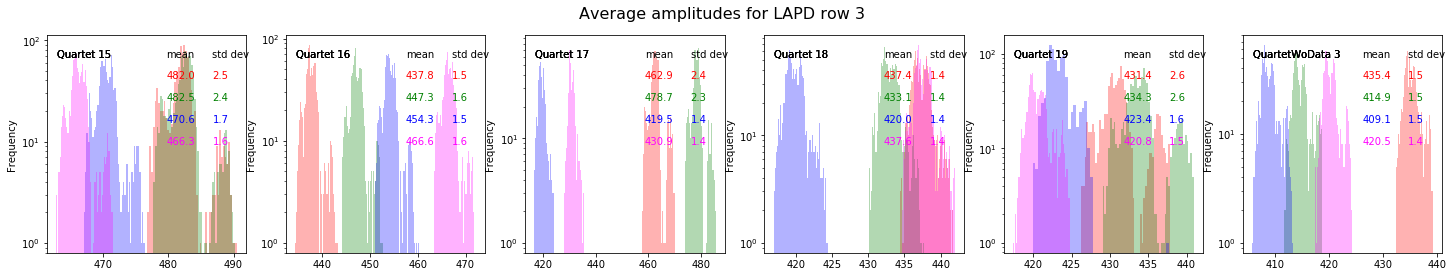

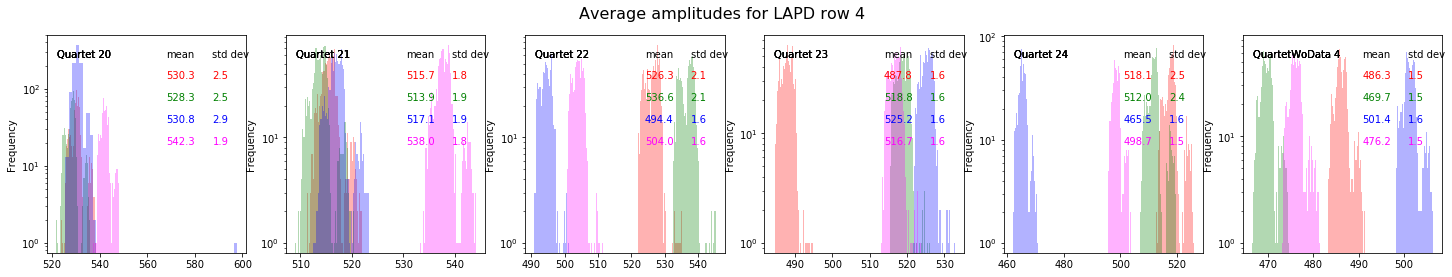

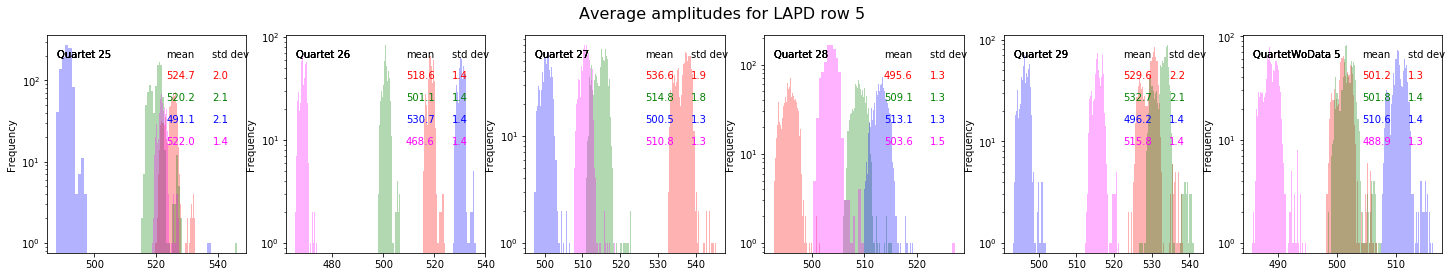

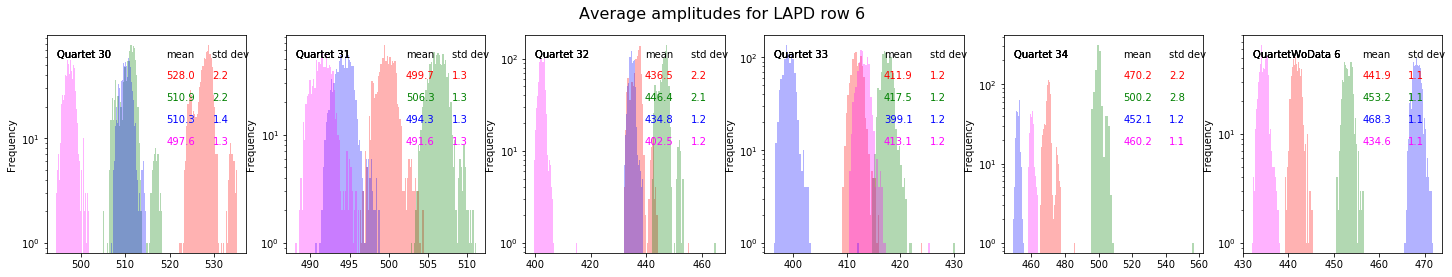

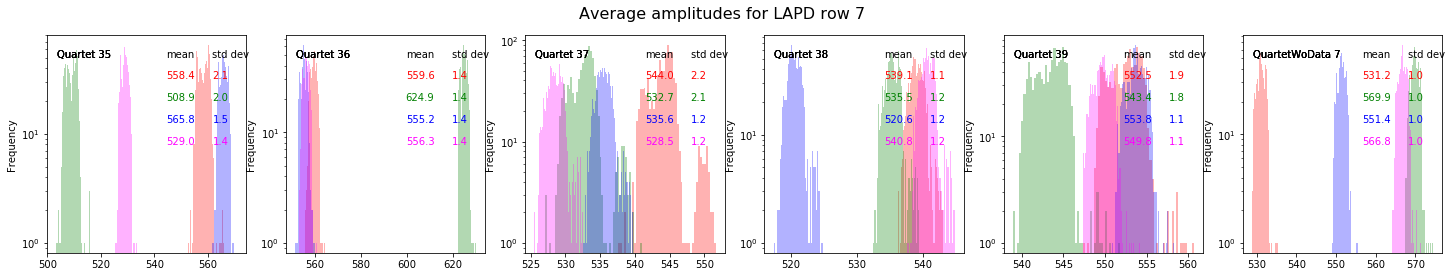

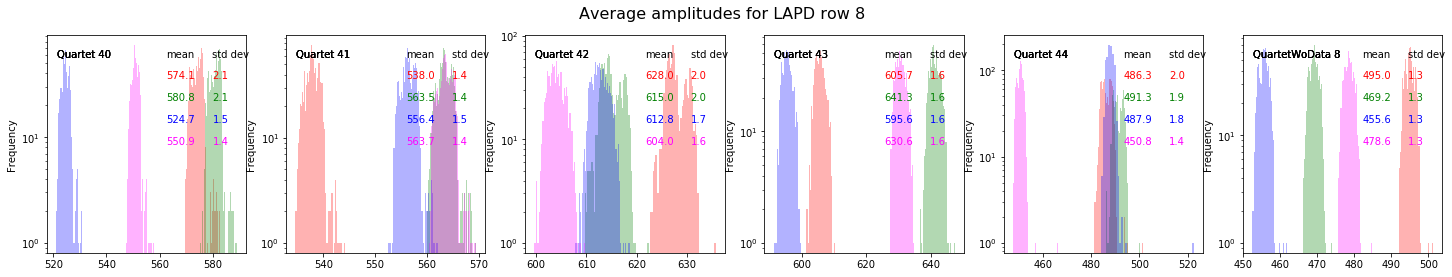

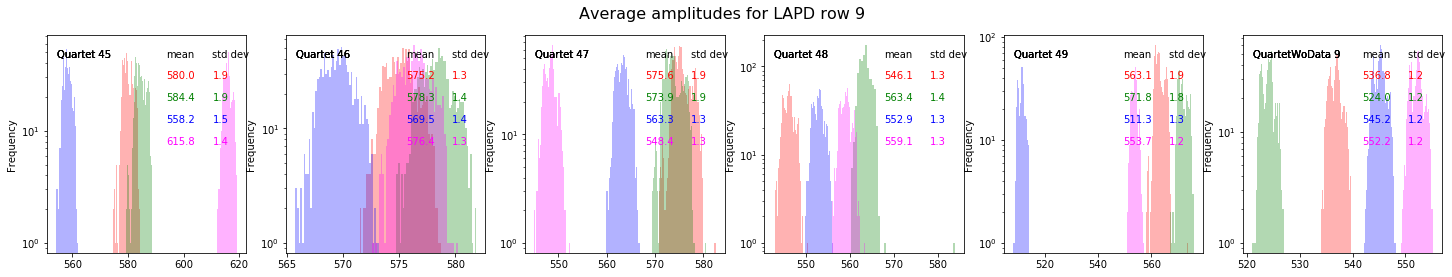

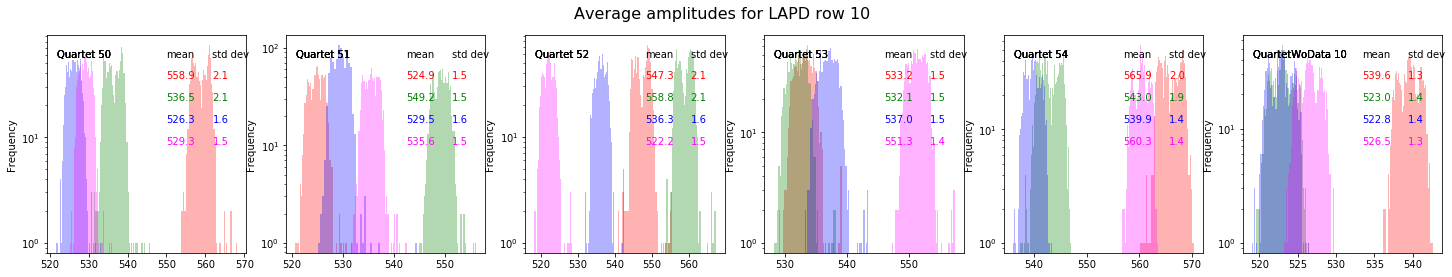

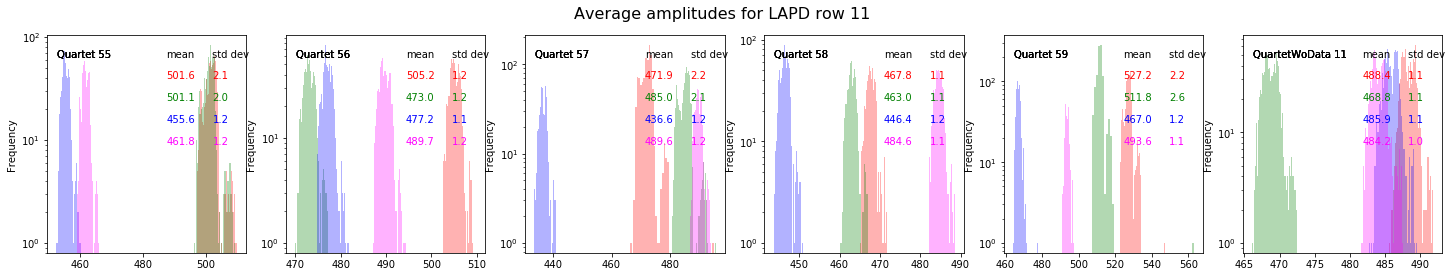

In [15]:
plotRow(iPlot=1, iLAPDRow=0)
plotRow(iPlot=2, iLAPDRow=1)
plotRow(iPlot=3, iLAPDRow=2)
plotRow(iPlot=4, iLAPDRow=3)
plotRow(iPlot=5, iLAPDRow=4)
plotRow(iPlot=6, iLAPDRow=5)
plotRow(iPlot=7, iLAPDRow=6)
plotRow(iPlot=8, iLAPDRow=7)
plotRow(iPlot=9, iLAPDRow=8)
plotRow(iPlot=10, iLAPDRow=9)
plotRow(iPlot=11, iLAPDRow=10)
plotRow(iPlot=12, iLAPDRow=11)